In [2]:
import shap
import xgboost
from datetime import datetime

from randomForest import prepareData
from randomForest import runRandomForest
from sklearn.metrics import accuracy_score
from copy import deepcopy
from pandas import read_csv
from pandas import DataFrame

from matplotlib import pyplot as plt



In [3]:
filePath = "../../data/core/uk/final/uk_final.csv"
imagePathXG = "../../images/Machine Learning/XGboost/"
accuracyListXG = []
accuracyListRF = []
accuracyListXGWal = []
accuracyListRFWal = []

In [4]:
rtNo = 0.5
rt = f"Rt <= {rtNo}"


trainingData, trainingRt, testData, testRt = prepareData(filePath, rt)

trainingDataWal, trainingRtWal, testDataWal, testRtWal = prepareData(filePath, rt, True)

In [5]:
noClass = 0
objective = 0

if len(rt) > 2:
    noClass = 2
else:
    noClass = 3
    

objective = "multi:softmax"

In [6]:
params = {
      'colsample_bynode': 0.8,
      'learning_rate': 0.5,
      'max_depth': 5,
      'num_parallel_tree': 100,
      'objective': objective,
      'subsample': 0.8,
      'tree_method': 'gpu_hist',
      'num_class': noClass,   
}

classiferXG = xgboost.train(params, xgboost.DMatrix(trainingData, label=trainingRt), num_boost_round=1)
classiferRF, accuracyRF = runRandomForest(trainingData, trainingRt, testData, testRt)

classiferXGWal = xgboost.train(params, xgboost.DMatrix(trainingDataWal, label=trainingRtWal), num_boost_round=1)
classiferRFWal, accuracyRFWal = runRandomForest(trainingDataWal, trainingRtWal, testDataWal, testRtWal)

[09:07:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:07:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [7]:
prediction = classiferXG.predict(xgboost.DMatrix(testData))
predictionWal = classiferXGWal.predict(xgboost.DMatrix(testDataWal))

In [8]:
accuracyXG = accuracy_score(testRt, prediction)
accuracyXGWal = accuracy_score(testRtWal, predictionWal)

In [9]:
accuracyListXG.append(accuracyXG)
accuracyListRF.append(accuracyRF)

accuracyListXGWal.append(accuracyXGWal)
accuracyListRFWal.append(accuracyRFWal)
print(len(accuracyListXG))

1


In [10]:
print(sum(accuracyListXG) / len(accuracyListXG))
print(sum(accuracyListRF) / len(accuracyListRF))

print(sum(accuracyListXGWal) / len(accuracyListXGWal))
print(sum(accuracyListRFWal) / len(accuracyListRFWal))

0.8663335415365396
0.9194253591505309
0.9799635701275046
0.9836065573770492


In [11]:
explainer = shap.TreeExplainer(classiferXG)
explainerWal = shap.TreeExplainer(classiferXGWal)

In [12]:

shapValues = explainer.shap_values(trainingData)
shapValuesWal = explainerWal.shap_values(trainingDataWal)

In [13]:
shap.initjs()

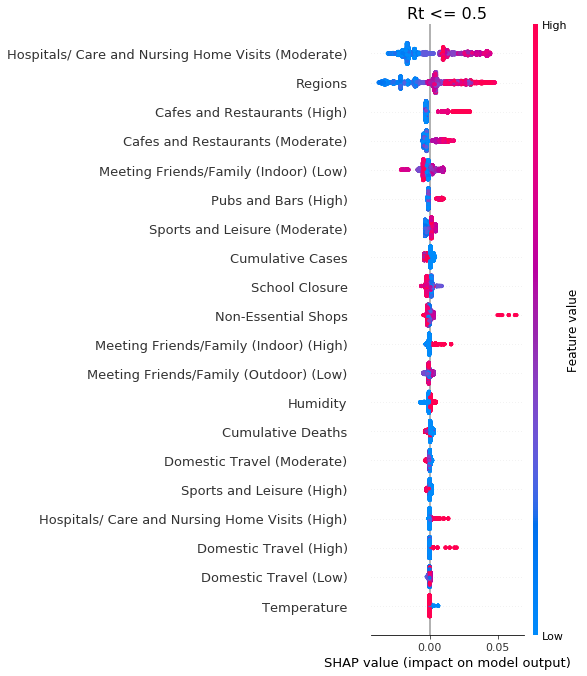

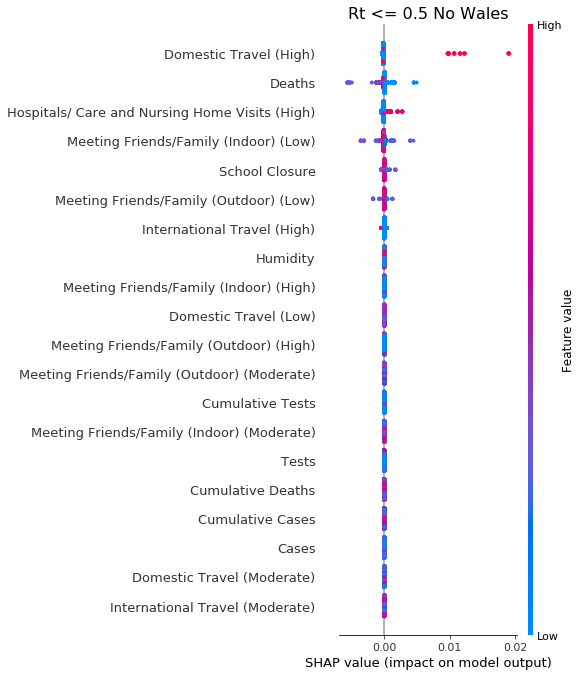

In [24]:
shap.summary_plot(shapValues[0], trainingData, show=False)
plt.title(rt,{'fontsize': 16})
plt.tight_layout()
plt.savefig(f"{imagePathXG}{datetime.now().strftime('%d_%m_%Y_%H_%M_%S')}.png", format="png")
plt.show()
            
shap.summary_plot(shapValuesWal[0], trainingDataWal, show=False)
plt.title(rt + " No Wales",{'fontsize': 16})
plt.tight_layout()
plt.savefig(f"{imagePathXG}No Wales{datetime.now().strftime('%d_%m_%Y_%H_%M_%S')}.png", format="png")
plt.show()

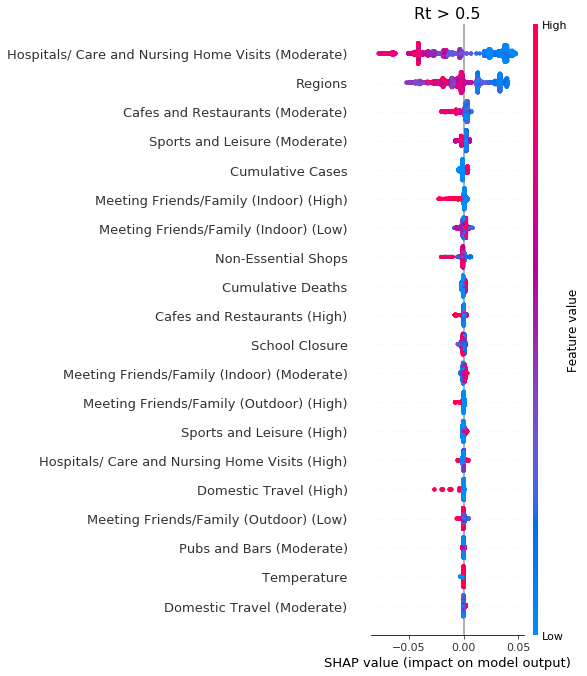

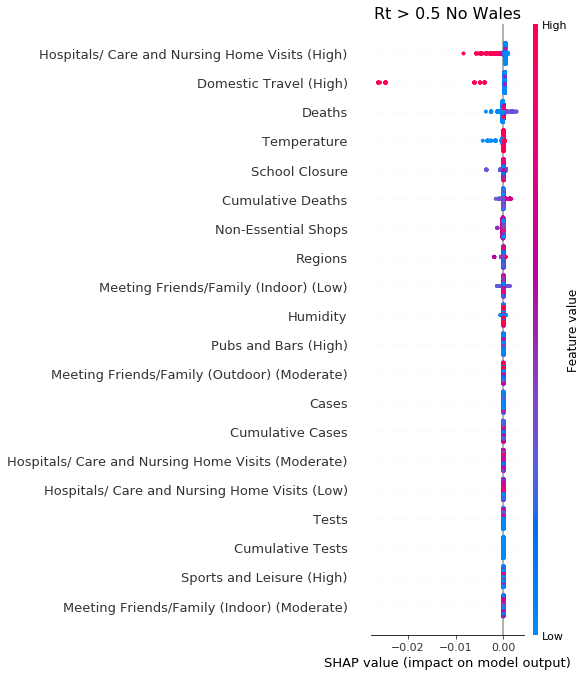

In [15]:
shap.summary_plot(shapValues[1], trainingData, show=False)
plt.title(f"Rt > {rtNo}",{'fontsize': 16})
plt.tight_layout()
plt.savefig(f"{imagePathXG}{datetime.now().strftime('%d_%m_%Y_%H_%M_%S')}.png", format="png")
plt.show()

shap.summary_plot(shapValuesWal[1], trainingDataWal, show=False)
plt.title(f"Rt > {rtNo} No Wales",{'fontsize': 16})
plt.tight_layout()
plt.savefig(f"{imagePathXG}No Wales{datetime.now().strftime('%d_%m_%Y_%H_%M_%S')}.png", format="png")
plt.show()


In [16]:
shap.summary_plot(shapValues[2], trainingDataWal)

IndexError: list index out of range

In [74]:
trainingDataWal.iloc[0,:]

Regions                                                7
Cases                                                  1
Cumulative Cases                                       1
Deaths                                                 0
Cumulative Deaths                                      1
Tests                                                  0
Cumulative Tests                                       0
Meeting Friends/Family (Indoor) (Low)                 38
Meeting Friends/Family (Indoor) (Moderate)            30
Meeting Friends/Family (Indoor) (High)                 0
Meeting Friends/Family (Outdoor) (Low)                38
Meeting Friends/Family (Outdoor) (Moderate)           30
Meeting Friends/Family (Outdoor) (High)                0
Domestic Travel (Low)                                 38
Domestic Travel (Moderate)                             0
Domestic Travel (High)                                 0
International Travel (Low)                            38
International Travel (Moderate)

In [75]:
shap.force_plot(explainer.expected_value[0],
                shapValues[0][1], 
                trainingDataWal.iloc[1])

In [76]:
shap.force_plot(explainer.expected_value[1],
                shapValues[0][1], 
                trainingDataWal.iloc[1])

In [77]:
shap.force_plot(explainer.expected_value[2],
                shapValues[0][1], 
                trainingDataWal.iloc[1])

IndexError: list index out of range

In [78]:
shap.force_plot(explainer.expected_value[0],
                shapValues[0][:100], 
                trainingData.iloc[:100])

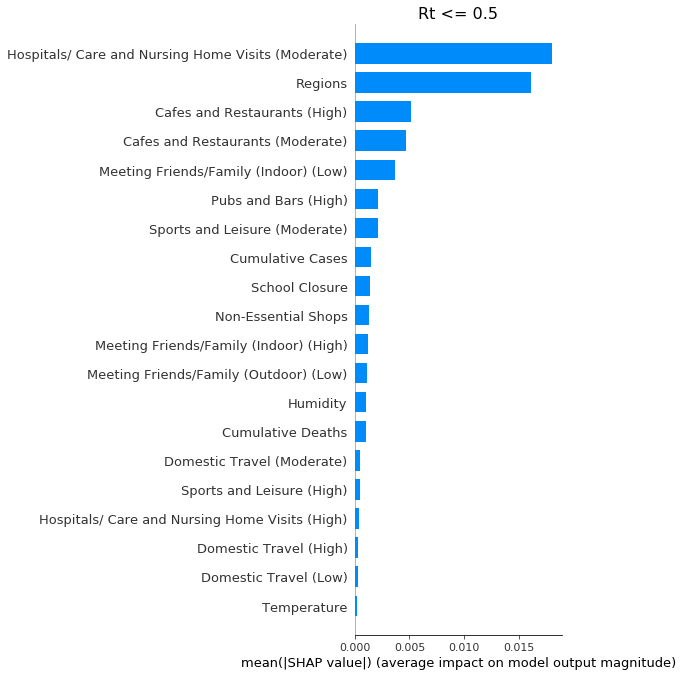

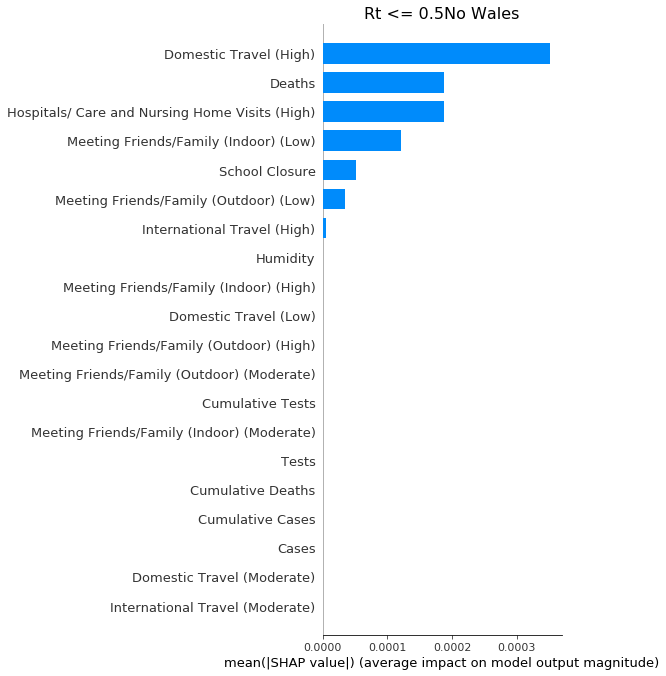

In [22]:
shap.summary_plot(shapValues[0], trainingData, plot_type="bar", show=False)
plt.title(rt,{'fontsize': 16})
plt.tight_layout()
plt.savefig(f"{imagePathXG}{datetime.now().strftime('%d_%m_%Y_%H_%M_%S')}.png", format="png")
plt.show()
            
shap.summary_plot(shapValuesWal[0], trainingDataWal, plot_type="bar", show=False)
plt.title(rt + "No Wales",{'fontsize': 16})
plt.tight_layout()
plt.savefig(f"{imagePathXG}No Wales{datetime.now().strftime('%d_%m_%Y_%H_%M_%S')}.png", format="png")
plt.show()

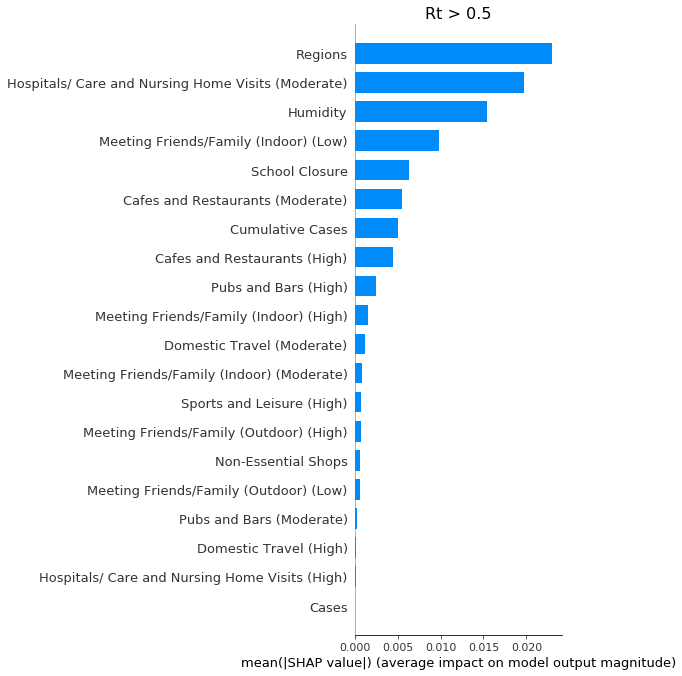

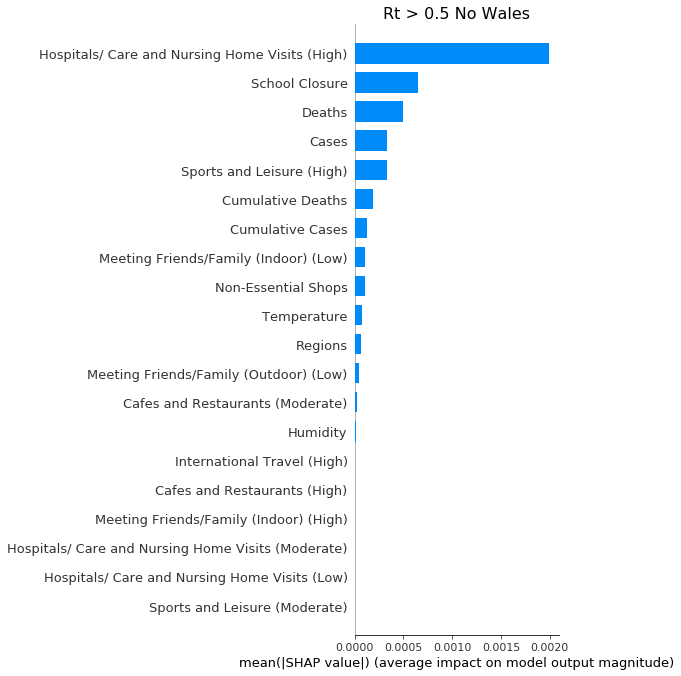

In [56]:
shap.summary_plot(shapValues[1], trainingData, plot_type="bar", show=False)
plt.title(f"Rt > {rtNo}",{'fontsize': 16})
plt.tight_layout()
plt.savefig(f"{imagePathXG}{datetime.now().strftime('%d_%m_%Y_%H_%M_%S')}.png", format="png")
plt.show()
            
shap.summary_plot(shapValuesWal[1], trainingDataWal, plot_type="bar", show=False)
plt.title(f"Rt > {rtNo} No Wales",{'fontsize': 16})
plt.tight_layout()
plt.savefig(f"{imagePathXG}No Wales{datetime.now().strftime('%d_%m_%Y_%H_%M_%S')}.png", format="png")
plt.show()

In [156]:
shap.summary_plot(shapValues[2], trainingData, plot_type="bar")

IndexError: list index out of range